L1 L2 Regularization: Reduce overfitting
Regularizers allow to apply penalties on layer parameters or layer activity during optimization. These penalties are incorporated in the loss function that the network optimizes.

Dense network, Cross Entropy Function, ReLu activation,  with 1 hidden layer.
Start from here to improve the model in later iterations
3 layers:
- first hiden layer : 64 units, ReLu
- second hiden layer : 64 units, ReLu
- Output: 10 units, softmax
- Learning rate : 0.1 
- loss = cross entropy
- Glorot Weight Initialization is the Keras default
- In this experiment, I use explicitly glorot_normal and biais to zeros (Keras default)
- batch Normalization
 
 Adding L1/L2

Results:
loss: 0.0153 - accuracy: 0.9960 - val_loss: 0.0792 - val_accuracy: 0.9771 (without Regularization)
loss: 0.0337 - accuracy: 0.9950 - val_loss: 0.0977 - val_accuracy: 0.9758 (With Regularizatoion)
Not convincing !

Import packages

In [92]:
#numpy: Numeric library
import numpy as np 
#graphics
from matplotlib import pyplot as plt

#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
#Import Dense layer
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras import Model
#Optimizers: SGD (Stochastic Gradien Descent)
#from tensorflow.keras.optimizers import SGD as sgd

#import data set MNIST
from tensorflow.keras.datasets import mnist

#Batch Norm
from tensorflow.keras.layers import BatchNormalization

# import regularizer
from tensorflow.keras import regularizers  


Some verifications

In [93]:
#TF
print(np.random.uniform())

0.6795395957592615


Import MNIST data set
60000 training examples
10000 validation examples
1 example = 28 * 28 matrix (image with 28 * 28 pixels)


In [94]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


In [95]:
print(x_train.shape)


(60000, 28, 28)


In [96]:
print(y_train.shape)

(60000,)


In [97]:
print(x_train[0].shape)

(28, 28)


In [98]:
print(y_train)
print(y_train.size)

[5 0 4 ... 5 6 8]
60000


In [99]:
print(x_valid.shape)
print(y_valid.shape)

(10000, 28, 28)
(10000,)


Process & Prepare data
Flattening Input data:
Input data (x_train[i]) should be a vector of real values
- From shape (60000, 28, 28) to shape (60000, 28 * 28)
- Convert to float32 (default is uint8, which python will convert to float64) (flaot 32 will take less memory)

In [100]:
#use numpy reshape
x_train = np.reshape(x_train, (60000, 28 * 28)).astype('float32')
x_valid = np.reshape(x_valid, (10000, 28 * 28)).astype('float32')

In [101]:
print(x_train.shape)
print(x_valid.shape)

(60000, 784)
(10000, 784)


Prepare Data (2)
divide by 255, so the values will range from 0 to 1


In [102]:
#print(x_train)
#x_train /=  255
#x_valid /=  255

Prepare labels (y_train and y_valid)
y_train[i] is given as a number (0, 9). We have 10 possible values. 
Convert to one-hot format:
0 => [1, 0, 0, 0, 0,0, 0,0, 0,0]
1 => [0, 1, 0, 0, 0,0, 0,0, 0,0]
9 => [0, 0, 0, 0, 0,0, 0,0, 0,1]

In [103]:
n_classes = 10
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, n_classes)
print(y_train[0])

print(y_valid[0])
y_valid = keras.utils.to_categorical(y_valid, n_classes)
print(y_valid[0])


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Define Neural Network Architecture
Using Keras API

In [104]:
#Define activations
activation = keras.activations.relu
softmax = keras.activations.softmax

#define loss function: Cross entropy
loss = keras.losses.categorical_crossentropy

#define metrics
metrics = [keras.metrics.Accuracy()]

#define optimizer
sgd=keras.optimizers.SGD(lr=0.1)
tf.print(sgd.lr)


0.1


In [105]:
# Sequential: model of type sequential (layer n can pass information only to layer n+1)
model = Sequential()
model.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential_10", "layers": []}, "keras_version": "2.2.4-tf", "backend": "tensorflow"}'

In [106]:
from tensorflow.keras.layers import Activation
#define First layer
inputSize = 28 * 28 # size of input vector
nbUnits = 64 #Number of input layer units (artificial neuron)
kernel_initializer='glorot_normal'
bias_initializer='zeros'

# instantiate regularizer
regL1 = regularizers.l2(0.0001) #default 0.01
regL2 = regularizers.l2(0.0001) #default 0.01

#use_bias = false => Not necessary eith batch Norm
firstLayer = Dense(nbUnits, use_bias=False, input_shape=(inputSize,),  kernel_regularizer=regL1)
model.add(firstLayer)
model.add(BatchNormalization())
model.add(Activation(activation))
 
secondlayer = Dense(nbUnits, use_bias=False, kernel_regularizer=regL2)
model.add(secondlayer)
model.add(BatchNormalization())
model.add(Activation(activation))

In [107]:
#define Output layer
 
outputUnits = 10 #Number of output layer units (artificial neuron)
# output shape will be inferred
outputLayer = Dense(outputUnits, activation=  softmax)
model.add(outputLayer)

In [108]:
#print Batch Norm
tf.print(model.layers[1].axis) 

ListWrapper([1])


In [109]:
#compile Model
model.compile(loss=loss, 
         optimizer=sgd,
         metrics=['accuracy'])

In [110]:
# print model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                50176     
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)                256       
_________________________________________________________________
activation_18 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4096      
_________________________________________________________________
batch_normalization_19 (Batc (None, 64)                256       
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

TensorBoard

In [111]:
from tensorflow.keras.callbacks import TensorBoard
import os 
import datetime
folder="logs/crossEntropyReLu2LayersWIBN"
if not os.path.exists(folder):
   os.mkdir(folder)
log_dir = folder + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
print(log_dir)
os.mkdir(log_dir)
 
tensorBoard = TensorBoard(log_dir, histogram_freq=1,profile_batch = 100000000)

logs/crossEntropyReLu2LayersWIBN/20200301-114953


In [112]:
# Train
batch_size = 128
nb_epoch = 20
history=model.fit(x_train, y_train, batch_size= batch_size, epochs = nb_epoch, verbose=1, validation_data=(x_valid, y_valid),
callbacks=[tensorBoard])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3474 - accuracy: 0.9082 - val_loss: 0.1940 - val_accuracy: 0.9470
Epoch 2/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1672 - accuracy: 0.9570 - val_loss: 0.1478 - val_accuracy: 0.9605
Epoch 3/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1282 - accuracy: 0.9675 - val_loss: 0.1240 - val_accuracy: 0.9663
Epoch 4/20
60000/60000 [==============================] - 2s 30us/sample - loss: 0.1070 - accuracy: 0.9736 - val_loss: 0.1099 - val_accuracy: 0.9716
Epoch 5/20
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0940 - accuracy: 0.9776 - val_loss: 0.1119 - val_accuracy: 0.9709
Epoch 6/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0827 - accuracy: 0.9805 - val_loss: 0.1007 - val_accuracy: 0.9746
Epoch 7/20
60000/60000 [==============================] 

Save Model

In [113]:
# serialize model to JSON
print(log_dir)
model_json = model.to_json()
with open(log_dir + "/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save(log_dir + "/model_all.h5")

logs/crossEntropyReLu2LayersWIBN/20200301-114953


Plot History

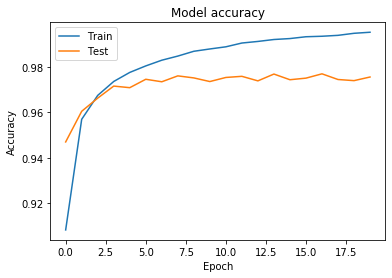

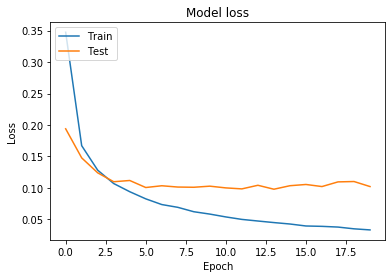

In [114]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [115]:
# summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                50176     
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)                256       
_________________________________________________________________
activation_18 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4096      
_________________________________________________________________
batch_normalization_19 (Batc (None, 64)                256       
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)              

In [116]:
json = model.to_json()
tf.print(json)

{"class_name": "Sequential", "config": {"name": "sequential_10", "layers": [{"class_name": "Dense", "config": {"name": "dense_26", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 64, "activation": "linear", "use_bias": false, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": {"class_name": "L1L2", "config": {"l1": 0.0, "l2": 9.999999747378752e-05}}, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_18", "trainable": true, "dtype": "float32", "axis": [1], "momentum": 0.99, "epsilon": 0.001, "center": true, "scale": true, "beta_initializer": {"class_name": "Zeros", "config": {}}, "gamma_initializer": {"class_name": "Ones", "config": {}}, "moving_mean_initializer": {"class_name": "Zeros", "config": {}}, "moving

End